# CEIA - Análisis de Datos
## Trabajo Práctico Número 1

### Grupo: 

          - Martín A. Brocca 
          - Agustín A. Lopez Fredes 

Dataset seleccionado: [AirBnB Dataset](https://insideairbnb.com/get-the-data/)

In [55]:
# importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from IPython.display import display, HTML
import geopandas as gpd



In [57]:
#  URL para descargar todos los archivos que conforman el dataset
data_base_url = "https://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2025-01-29"


# Definimos los nombres de los archivos y sus correspondientes URLs
data_files = {
    "df_listings_details": "/data/listings.csv.gz",
    "df_reviews_details": "/data/reviews.csv.gz",
    "df_calendar": "/data/calendar.csv.gz",
    "df_listings": "/visualisations/listings.csv",
    "df_reviews": "/visualisations/reviews.csv",
    "df_neighbourhoods": "/visualisations/neighbourhoods.csv",
}


# Carga directa de los archivos CSV desde la URL
dfs = {
    #name: pd.read_csv(base_url + filename, compression="gzip" if filename.endswith(".gz") else None)
    name: pd.read_csv(data_base_url + filename)
    for name, filename in data_files.items()
}
# Carga del archivo GeoJSON
dfs["df_neighbourhoods_geojson"] = gpd.read_file(
    data_base_url + "/visualisations/neighbourhoods.geojson"
)


In [ ]:
# # Creación de las variables individuales.
# df_listings_details = dfs["df_listings_details"]
# df_neighborhoods = dfs["df_neighbourhoods"]
# df_reviews_details = dfs["df_reviews_details"]
# df_calendar = dfs["df_calendar"]
# df_neighborhoods_geojson = dfs["df_neighbourhoods_geojson"]

In [ ]:
# df_neighborhoods_geojson

,"{""type"":""FeatureCollection""","features:[{""type"":""Feature""","geometry:{""type"":""MultiPolygon""",coordinates:[[[[-58.452821,-34.595988],[-58.453656,-34.596555],[-58.453768,-34.596634],[-58.453817,...,[-58.456783,-34.527542],[-58.456738,-34.527547],[-58.456656,-34.527554].1,[-58.456656.1,-34.527554]]]]},"properties:{""neighbourhood"":""Nuñez""",neighbourhood_group:null}}]}


In [60]:
#Análisis de los tamaños de los dataframes
summary = pd.DataFrame(
    [(name, df.shape[0], df.shape[1]) for name, df in dfs.items()],
    columns=["DataFrame", "Rows", "Columns"]
)

print(summary)
    

                   DataFrame      Rows  Columns
0        df_listings_details     35172       79
1         df_reviews_details    985786        6
2                df_calendar  12837777        7
3                df_listings     35172       18
4                 df_reviews    985786        2
5          df_neighbourhoods        49        2
6  df_neighbourhoods_geojson        49        3


### Comienzo del EDA, se procederá con el examen un dataset a la vez.

In [61]:
#listamos los nombres de las columnas para ver si comunes y juntar los dataframes
display(HTML(f"<span style='color: cyan;'>Columnas de df_listings_details:</span>"))
print(df_listings_details.columns)
display(HTML(f"<span style='color: cyan;'>Columnas de df_reviews_details:</span>"))
print(df_reviews_details.columns)
display(HTML(f"<span style='color: cyan;'>Columnas de df_calendar:</span>"))
print(df_calendar.columns)
display(HTML(f"<span style='color: cyan;'>Columnas de df_neighborhoods:</span>"))
print(df_neighborhoods.columns)
# Comprobamos si hay columnas comunes entre los dataframes
common_columns = set(df_listings_details.columns) & set(df_reviews_details.columns) & set(df_calendar.columns) & set(df_neighborhoods.columns)
display(HTML(f"<span style='color: cyan;'>Columnas comunes entre los dataframes:</span>"))
print(common_columns)  

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

Index(['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments'], dtype='object')


Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')


Index(['neighbourhood_group', 'neighbourhood'], dtype='object')


set()


Aca veo como el es dataframe de reviews, pero resulta en una relacion de muchos a uno

In [42]:
df_reviews_details.groupby('listing_id').size().reset_index(name='count').sort_values(by='count', ascending=False)


,listing_id,count
7519,44166461,992
698,2018802,771
172,370013,549
2557,17806895,539
3084,22002003,538
...,...,...
12192,753325194565837128,1
12191,753189677844515216,1
26293,1195710819561320333,1
12176,752873928171501392,1


ahora veamos a calendar

In [62]:
def explore_df(df, name):
    display(HTML(f"<span style='color: cyan;'>--- {name} ---</span>"))
    print(f"")
    print("Shape:", df.shape)
    print("\nColumn Types:")
    display(df.dtypes)

    print("\nMissing Values:")
    display(df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False))

    print("\nBasic Stats (numerical):")
    display(df.describe().T)

    print("\nBasic Stats (categorical):")
    display(df.select_dtypes(include='object').describe().T)

    print("\nSample Rows:")
    display(df.head(3))

    print("-" * 50 + "\n")

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_missing(df, name):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False)
    plt.title(f"Missing Data Heatmap - {name}")
    plt.show()


Shape: (35172, 79)

Column Types:


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
source                                           object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 79, dtype: object


Missing Values:


neighbourhood_group_cleansed    35172
calendar_updated                35172
license                         34782
neighbourhood                   18584
neighborhood_overview           18584
host_about                      16291
host_neighbourhood              13451
host_location                    7553
review_scores_accuracy           5761
review_scores_value              5761
review_scores_communication      5760
review_scores_location           5760
review_scores_cleanliness        5760
review_scores_rating             5760
last_review                      5760
first_review                     5760
review_scores_checkin            5760
reviews_per_month                5760
host_response_time               4229
host_response_rate               4229
host_acceptance_rate             3712
price                            3574
estimated_revenue_l365d          3574
bathrooms                        3570
beds                             3568
host_is_superhost                2101
has_availabi


Basic Stats (numerical):


,count,mean,std,min,25%,50%,75%,max
id,35172.0,7.117880e+17,4.840974e+17,1.150800e+04,4.719776e+07,8.875662e+17,1.095206e+18,1.344330e+18
scrape_id,35172.0,2.025013e+13,0.000000e+00,2.025013e+13,2.025013e+13,2.025013e+13,2.025013e+13,2.025013e+13
host_id,35172.0,2.143294e+08,2.027420e+08,1.342600e+04,3.070016e+07,1.421004e+08,4.298024e+08,6.754917e+08
host_listings_count,35166.0,1.953964e+01,4.128934e+01,1.000000e+00,1.000000e+00,3.000000e+00,1.600000e+01,6.700000e+02
host_total_listings_count,35166.0,2.942555e+01,7.958366e+01,1.000000e+00,1.000000e+00,4.000000e+00,2.000000e+01,2.542000e+03
neighbourhood_group_cleansed,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,35172.0,-3.459155e+01,1.825693e-02,-3.469370e+01,-3.460267e+01,-3.459089e+01,-3.458105e+01,-3.453498e+01
longitude,35172.0,-5.841729e+01,3.016859e-02,-5.853089e+01,-5.843705e+01,-5.841891e+01,-5.839211e+01,-5.835540e+01
accommodates,35172.0,2.943535e+00,1.550894e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,31602.0,1.236504e+00,6.569959e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,2.200000e+01



Basic Stats (categorical):


,count,unique,top,freq
listing_url,35172,35172,https://www.airbnb.com/rooms/11508,1
last_scraped,35172,4,2025-01-30,26254
source,35172,2,city scrape,31613
name,35172,32871,Departamento en Buenos Aires,98
description,34299,30441,Enjoy the simplicity of this quiet and central...,148
neighborhood_overview,16588,13465,"San Telmo, a historic neighborhood in Buenos A...",64
picture_url,35171,34512,https://a0.muscache.com/pictures/hosting/Hosti...,9
host_url,35172,17820,https://www.airbnb.com/users/show/11256892,222
host_name,35166,4344,Federico,533
host_since,35166,4622,2014-01-13,245



Sample Rows:


,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20250129142212,2025-01-30,city scrape,Amazing Luxurious Apt-Palermo Soho,LUXURIOUS 1 BDRM APT- POOL/ GYM/ 24-HR SECURIT...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,...,4.98,4.93,4.86,NaN,f,1,1,0,0,0.29
1,14222,https://www.airbnb.com/rooms/14222,20250129142212,2025-01-30,city scrape,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,...,4.90,4.87,4.75,NaN,f,6,6,0,0,0.80
2,15074,https://www.airbnb.com/rooms/15074,20250129142212,2025-01-30,previous scrape,ROOM WITH RIVER SIGHT,NaN,NaN,https://a0.muscache.com/pictures/91166/c0fdcb4...,59338,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN


--------------------------------------------------



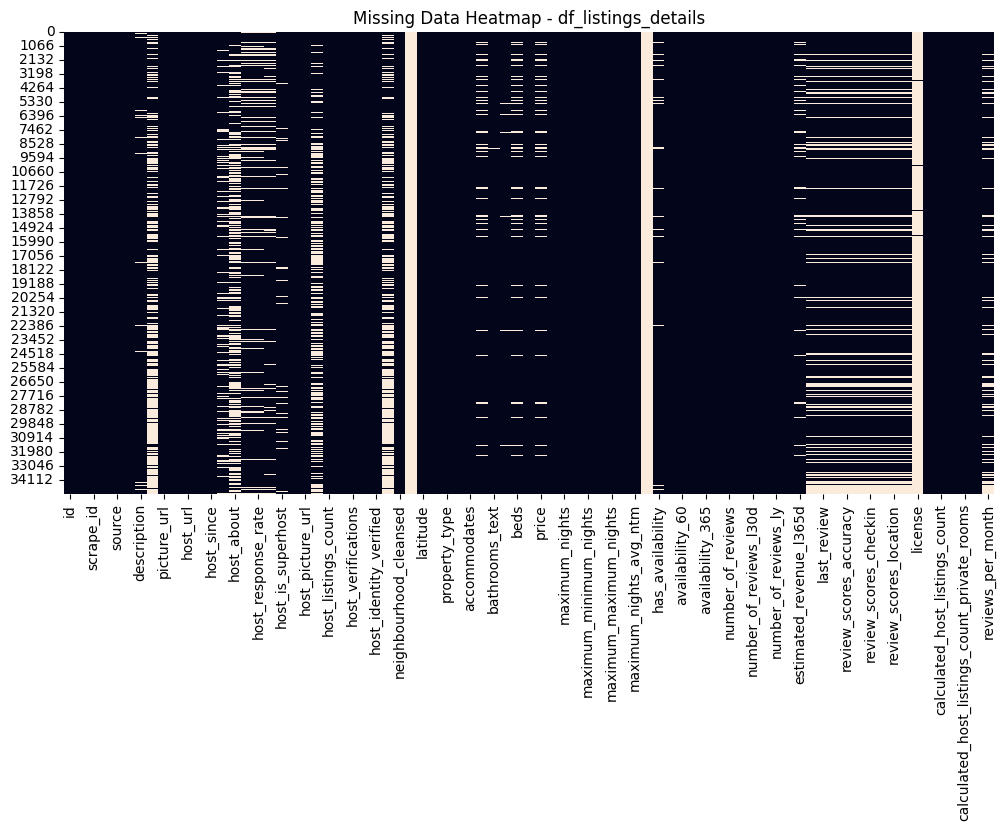


Shape: (985786, 6)

Column Types:


listing_id        int64
id                int64
date             object
reviewer_id       int64
reviewer_name    object
comments         object
dtype: object


Missing Values:


comments         45
reviewer_name     1
dtype: int64


Basic Stats (numerical):


,count,mean,std,min,25%,50%,75%,max
listing_id,985786.0,4.144489e+17,4.538855e+17,11508.0,2.482731e+07,5.246691e+07,8.592492e+17,1.340173e+18
id,985786.0,7.998363e+17,4.590446e+17,44034.0,5.970063e+17,9.564739e+17,1.155868e+18,1.345782e+18
reviewer_id,985786.0,2.229755e+08,1.838945e+08,1.0,5.817992e+07,1.700336e+08,3.834669e+08,6.754955e+08



Basic Stats (categorical):


,count,unique,top,freq
date,985786,4939,2023-11-12,2526
reviewer_name,985785,86559,Pablo,7665
comments,985741,931294,.,2718



Sample Rows:


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11508,1615861,2012-07-02,877808,Charlie,Amazing place!\r<br/>\r<br/>Location: short wa...
1,11508,3157005,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...
2,11508,3281011,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...


--------------------------------------------------



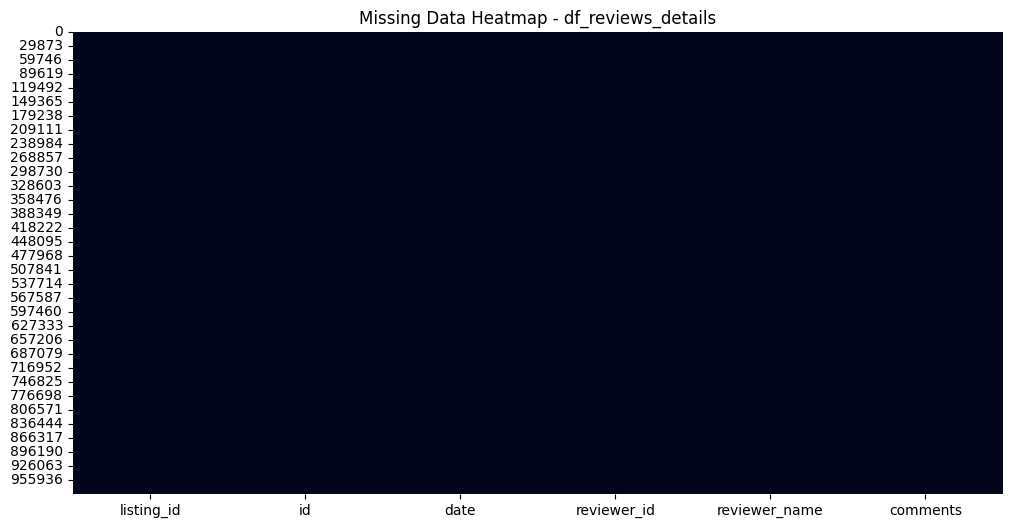


Shape: (12837777, 7)

Column Types:


listing_id          int64
date               object
available          object
price              object
adjusted_price    float64
minimum_nights    float64
maximum_nights    float64
dtype: object


Missing Values:


adjusted_price    12837777
minimum_nights          14
maximum_nights          14
dtype: int64


Basic Stats (numerical):


,count,mean,std,min,25%,50%,75%,max
listing_id,12837777.0,7.117867e+17,4.840909e+17,11508.0,47194560.0,8.875646e+17,1.095203e+18,1.344330e+18
adjusted_price,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
minimum_nights,12837763.0,6.025412e+00,2.418471e+01,1.0,2.0,2.000000e+00,4.000000e+00,1.000000e+03
maximum_nights,12837763.0,6.112193e+02,4.453138e+02,1.0,365.0,3.650000e+02,1.125000e+03,1.825000e+03



Basic Stats (categorical):


,count,unique,top,freq
date,12837777,369,2025-08-02,35172
available,12837777,2,t,7276094
price,12837777,781,$30.00,799351



Sample Rows:


,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11508,2025-01-30,f,$60.00,NaN,3.0,1125.0
1,11508,2025-01-31,f,$60.00,NaN,3.0,1125.0
2,11508,2025-02-01,f,$60.00,NaN,3.0,1125.0


--------------------------------------------------



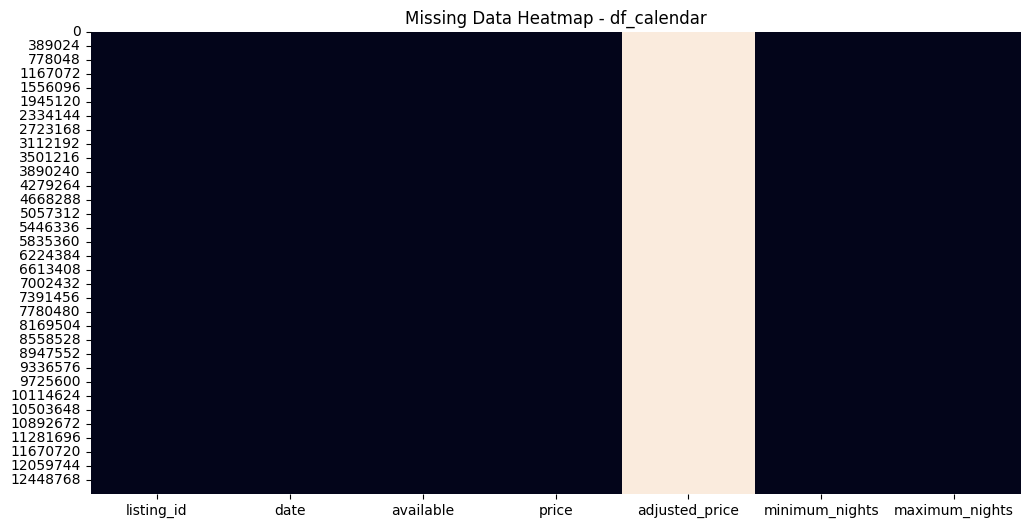


Shape: (35172, 18)

Column Types:


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object


Missing Values:


neighbourhood_group    35172
license                34782
last_review             5760
reviews_per_month       5760
price                   3574
host_name                  6
dtype: int64


Basic Stats (numerical):


,count,mean,std,min,25%,50%,75%,max
id,35172.0,7.117880e+17,4.840974e+17,11508.00000,4.719776e+07,8.875662e+17,1.095206e+18,1.344330e+18
host_id,35172.0,2.143294e+08,2.027420e+08,13426.00000,3.070016e+07,1.421004e+08,4.298024e+08,6.754917e+08
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,35172.0,-3.459155e+01,1.825693e-02,-34.69370,-3.460267e+01,-3.459089e+01,-3.458105e+01,-3.453498e+01
longitude,35172.0,-5.841729e+01,3.016859e-02,-58.53089,-5.843705e+01,-5.841891e+01,-5.839211e+01,-5.835540e+01
price,31598.0,9.548776e+04,1.402656e+06,260.00000,2.971100e+04,3.990800e+04,5.776200e+04,1.050217e+08
minimum_nights,35172.0,6.159871e+00,2.607200e+01,1.00000,1.000000e+00,2.000000e+00,4.000000e+00,1.000000e+03
number_of_reviews,35172.0,2.802758e+01,4.515167e+01,0.00000,2.000000e+00,1.100000e+01,3.600000e+01,9.920000e+02
reviews_per_month,29412.0,1.325920e+00,1.336446e+00,0.01000,3.600000e-01,9.300000e-01,1.910000e+00,2.608000e+01
calculated_host_listings_count,35172.0,1.564688e+01,3.410869e+01,1.00000,1.000000e+00,2.000000e+00,1.200000e+01,2.220000e+02



Basic Stats (categorical):


,count,unique,top,freq
name,35172,32872,Departamento en Buenos Aires,98
host_name,35166,4344,Federico,533
neighbourhood,35172,48,Palermo,11410
room_type,35172,4,Entire home/apt,32083
last_review,29412,1757,2025-01-26,598
license,390,365,RL-2021-14800886,8



Sample Rows:


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,67518.0,3,44,2025-01-26,0.29,1,300,5,NaN
1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NaN,Palermo,-34.58617,-58.41036,Entire home/apt,22375.0,7,123,2025-01-18,0.80,6,44,8,NaN
2,15074,ROOM WITH RIVER SIGHT,59338,Monica,NaN,Nuñez,-34.53892,-58.46599,Private room,NaN,29,0,NaN,NaN,1,0,0,NaN


--------------------------------------------------



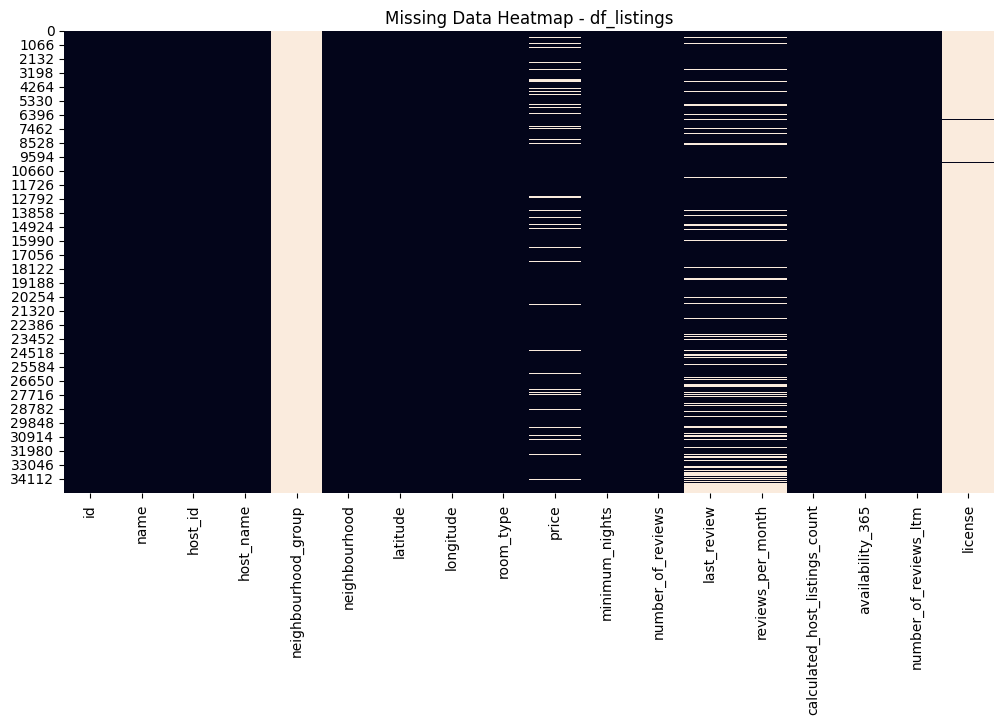


Shape: (985786, 2)

Column Types:


listing_id     int64
date          object
dtype: object


Missing Values:


Series([], dtype: int64)


Basic Stats (numerical):


,count,mean,std,min,25%,50%,75%,max
listing_id,985786.0,4.144489e+17,4.538855e+17,11508.0,24827309.0,52466914.0,8.592492e+17,1.340173e+18



Basic Stats (categorical):


,count,unique,top,freq
date,985786,4939,2023-11-12,2526



Sample Rows:


,listing_id,date
0,11508,2012-07-02
1,11508,2012-12-26
2,11508,2013-01-05


--------------------------------------------------



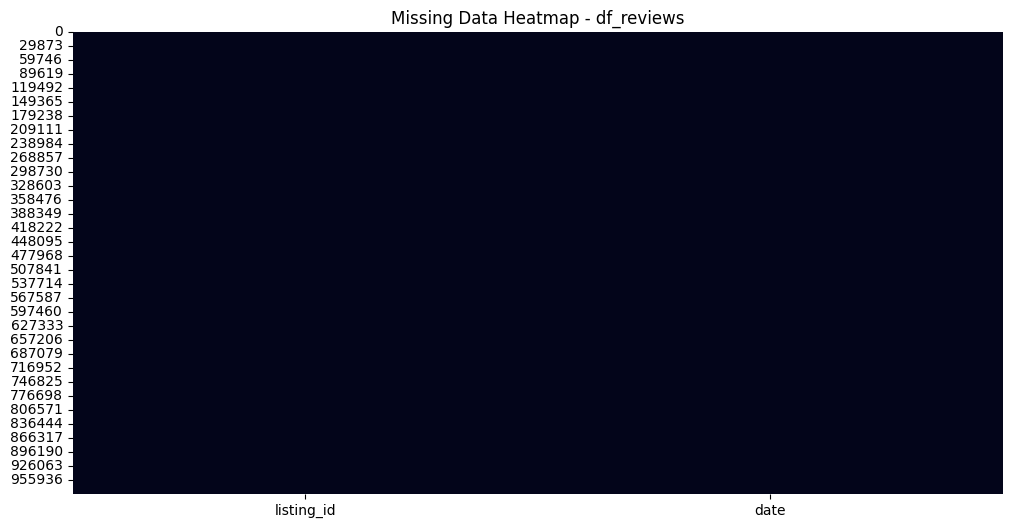


Shape: (49, 2)

Column Types:


neighbourhood_group    float64
neighbourhood           object
dtype: object


Missing Values:


neighbourhood_group    49
dtype: int64


Basic Stats (numerical):


,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Basic Stats (categorical):


,count,unique,top,freq
neighbourhood,49,49,Agronomia,1



Sample Rows:


,neighbourhood_group,neighbourhood
0,NaN,Agronomia
1,NaN,Almagro
2,NaN,Balvanera


--------------------------------------------------



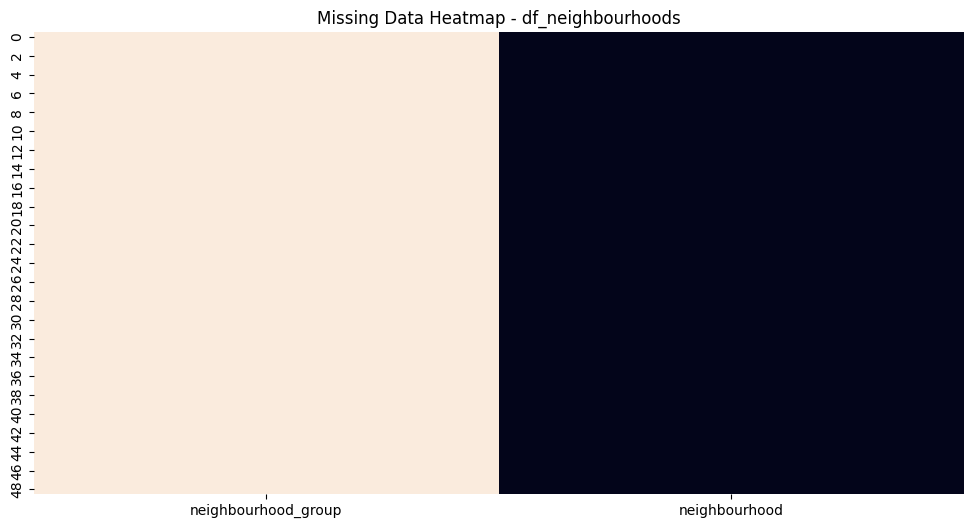


Shape: (49, 3)

Column Types:


neighbourhood            object
neighbourhood_group      object
geometry               geometry
dtype: object


Missing Values:


neighbourhood_group    49
dtype: int64


Basic Stats (numerical):


,count,unique,top,freq
neighbourhood,49,49,Chacarita,1
neighbourhood_group,0,0,NaN,NaN
geometry,49,49,"MULTIPOLYGON (((-58.452821 -34.595988, -58.453...",1



Basic Stats (categorical):


,count,unique,top,freq
neighbourhood,49,49,Chacarita,1
neighbourhood_group,0,0,NaN,NaN



Sample Rows:


,neighbourhood,neighbourhood_group,geometry
0,Chacarita,None,"MULTIPOLYGON (((-58.45282 -34.59599, -58.45366..."
1,Villa Crespo,None,"MULTIPOLYGON (((-58.42376 -34.59783, -58.42496..."
2,Palermo,None,"MULTIPOLYGON (((-58.42676 -34.55202, -58.42676..."


--------------------------------------------------



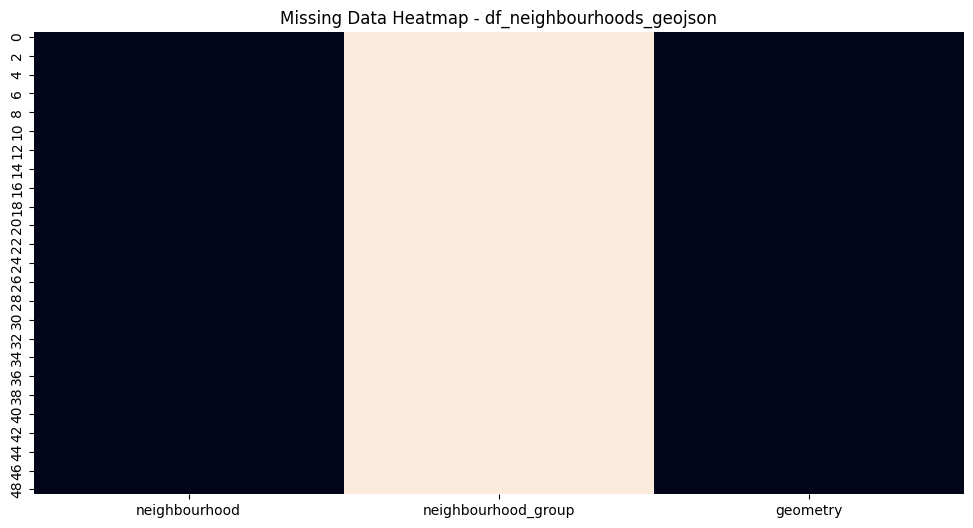

In [65]:
for name, df in dfs.items():
    explore_df(df, name)
    plot_missing(df, name)

# Dibujamos el mapa

<Axes: >

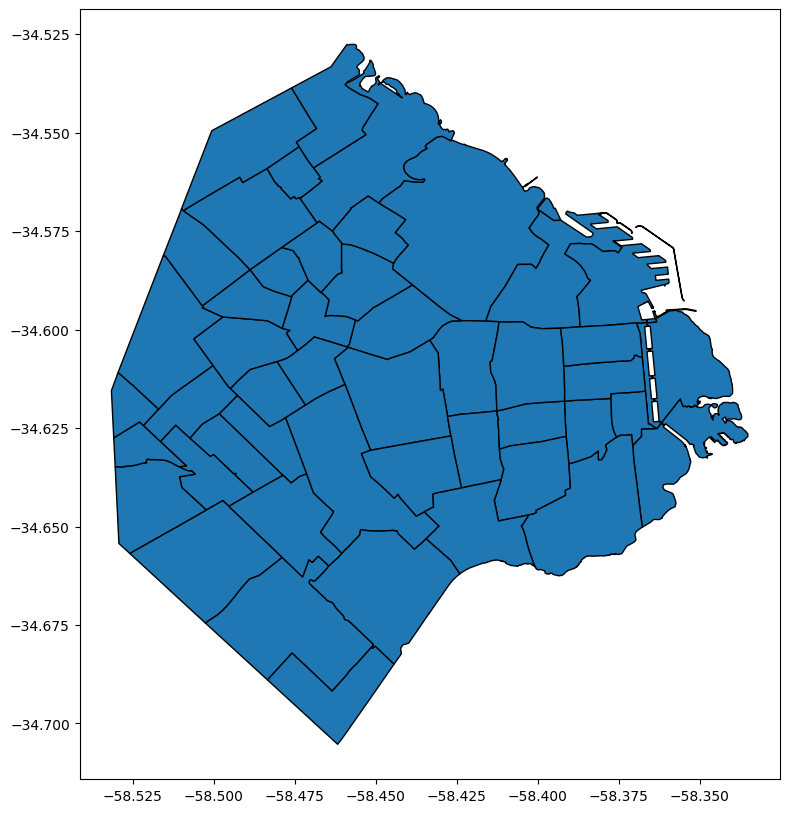

In [68]:
dfs["df_neighbourhoods_geojson"].plot(edgecolor='black', figsize=(10,10))


In [69]:
from shapely.geometry import Point

# Create geometry column from latitude and longitude
listings_df = dfs["df_listings"].dropna(subset=["latitude", "longitude"]).copy()
listings_gdf = gpd.GeoDataFrame(
    listings_df,
    geometry=gpd.points_from_xy(listings_df.longitude, listings_df.latitude),
    crs="EPSG:4326"  # WGS84 coordinate system
)

In [75]:
listings_gdf = listings_gdf.to_crs(neigh_gdf.crs)

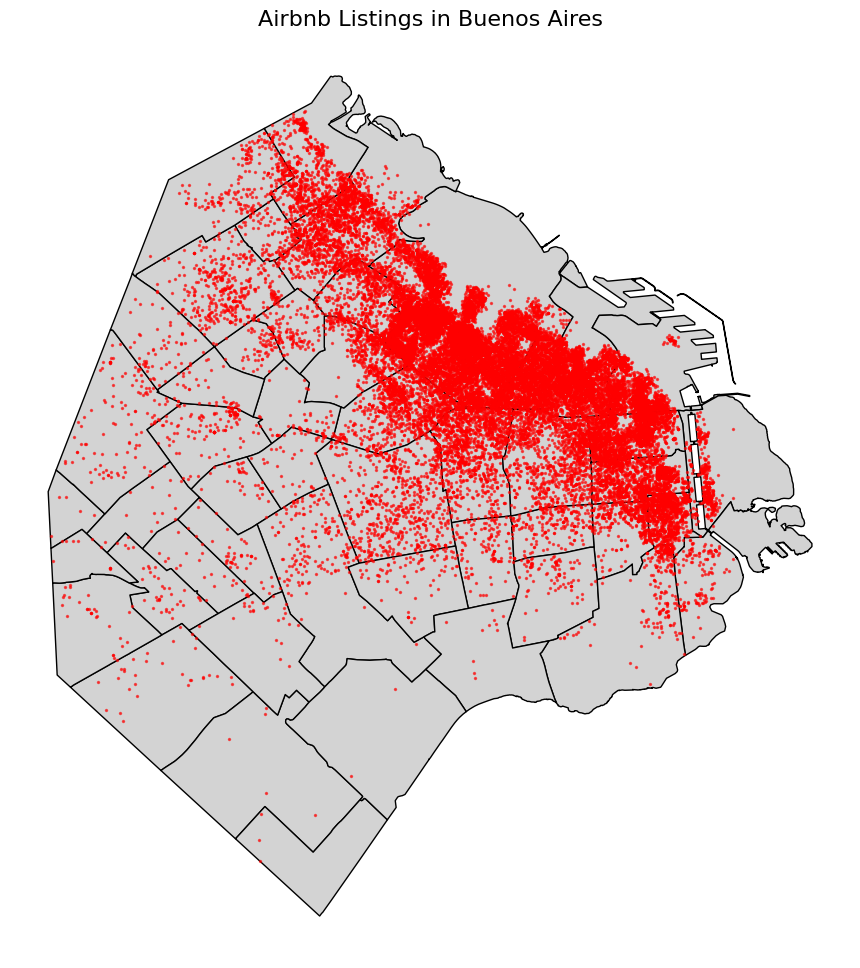

In [76]:
import matplotlib.pyplot as plt

# Neighborhood polygons
neigh_gdf = dfs["df_neighbourhoods_geojson"]

fig, ax = plt.subplots(figsize=(12, 12))

# Plot neighborhoods
neigh_gdf.plot(ax=ax, edgecolor='black', facecolor='lightgrey')

# Plot listings
listings_gdf.plot(ax=ax, color='red', markersize=2, alpha=0.6)

# Optional: add a title and remove axes
ax.set_title("Airbnb Listings in Buenos Aires", fontsize=16)
plt.axis('off')
plt.show()

In [77]:
import geopandas as gpd
from shapely.geometry import Point

# Drop missing values
df = dfs["df_listings_details"].dropna(subset=["latitude", "longitude", "review_scores_value"]).copy()

# Create GeoDataFrame
gdf_listings = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df.longitude, df.latitude),
    crs="EPSG:4326"
)

In [78]:
listings_gdf = listings_gdf.to_crs(neigh_gdf.crs)

In [72]:
gdf_neigh = dfs["df_neighbourhoods_geojson"]
gdf_listings = gdf_listings.to_crs(gdf_neigh.crs)

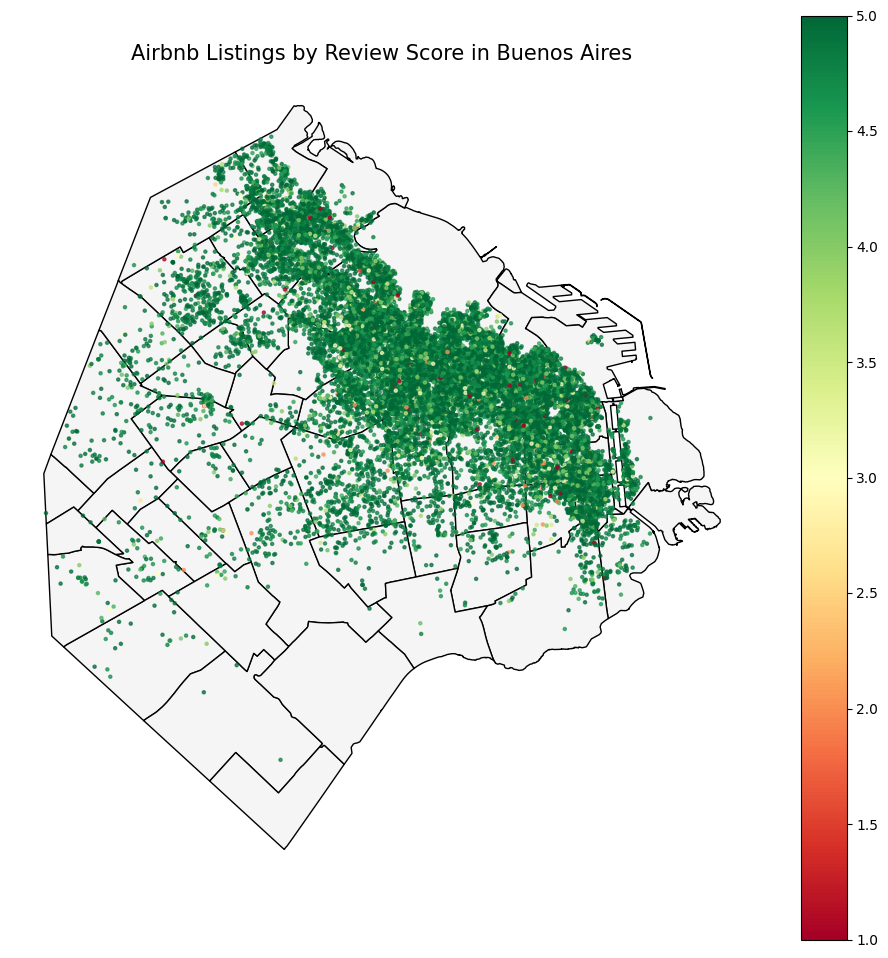

In [79]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))

# Plot neighborhoods in light grey
gdf_neigh.plot(ax=ax, edgecolor='black', facecolor='whitesmoke')

# Plot listings colored by review score
gdf_listings.plot(
    ax=ax,
    column='review_scores_value',
    cmap='RdYlGn',  # Red-Yellow-Green color scale
    markersize=5,
    legend=True,
    alpha=0.7
)

# Add title and remove axes
ax.set_title("Airbnb Listings by Review Score in Buenos Aires", fontsize=15)
plt.axis('off')
plt.show()
